# Validation of entanglement generation functions

In [1]:
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm.notebook import tqdm
import importlib as imp
import random

import main_cd as main
import main_cd_plots as pltm

# Save figures in the notebook with decent quality
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

---

# Parameters

In [22]:
imp.reload(main)

# Inputs
protocol = 'srs'
d = 2
k = 3
n = int(str(d)+str(k)) # This variable is only for data storage purposes
p_gen = 1
q_swap = 1
p_swap = 0
max_links_swapped = 4
p_cons = 0
cutoff = 100
qbits_per_channel = 5

# Topology
A = main.adjacency_tree(d,k)
topology = 'tree'

# Test parameters
total_time = 20

# Numerical
randomseed = 2

---

## Plot network over time

---

----------
t = 0
vdeg_0 (before) = 0
1 2 3
4 0 6
0 1 4
vdeg_0 (after) = 0


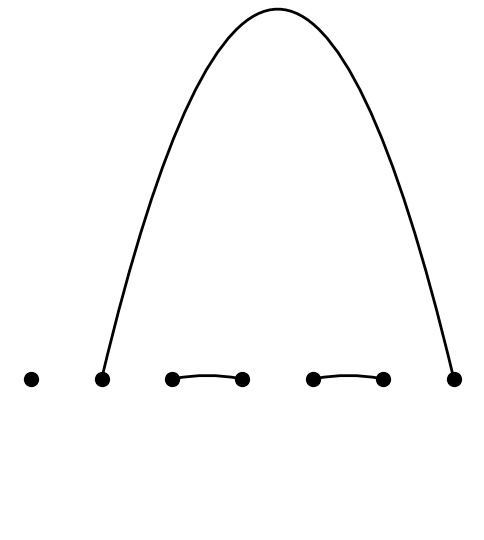

----------
t = 1
vdeg_0 (before) = 0
0 4 1
1 3 2
4 6 5
vdeg_0 (after) = 0


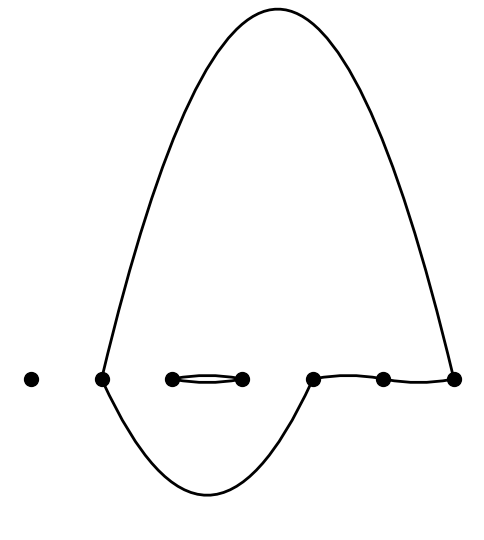

----------
t = 2
vdeg_0 (before) = 0
0 4 1
1 0 3
4 5 6
vdeg_0 (after) = 0


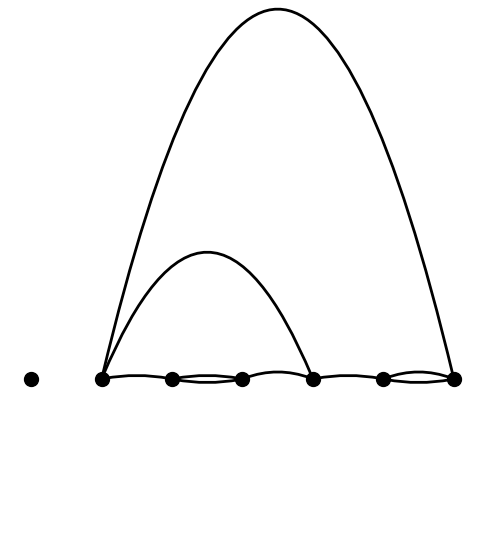

----------
t = 3
vdeg_0 (before) = 0
0 4 1
1 2 0
4 6 5
vdeg_0 (after) = 0


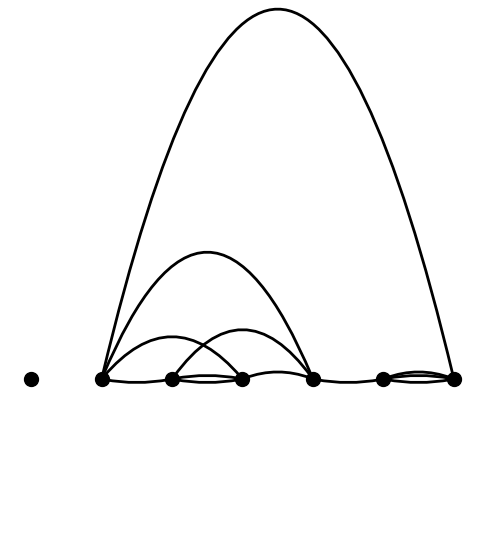

----------
t = 4
vdeg_0 (before) = 0
0 4 1
4 0 6
1 2 3
vdeg_0 (after) = 0


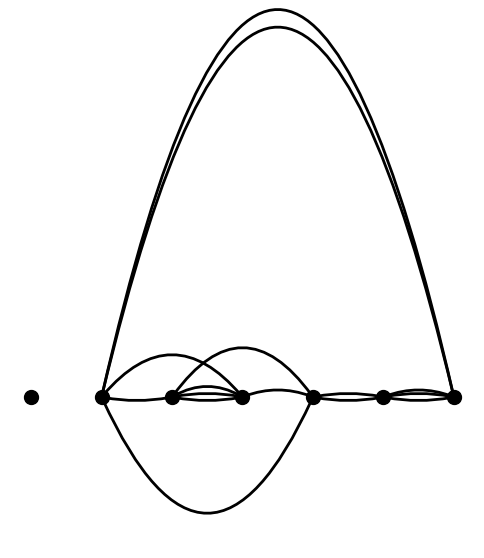

----------
t = 5
vdeg_0 (before) = 0
1 0 2
4 5 0
0 4 1
vdeg_0 (after) = 0


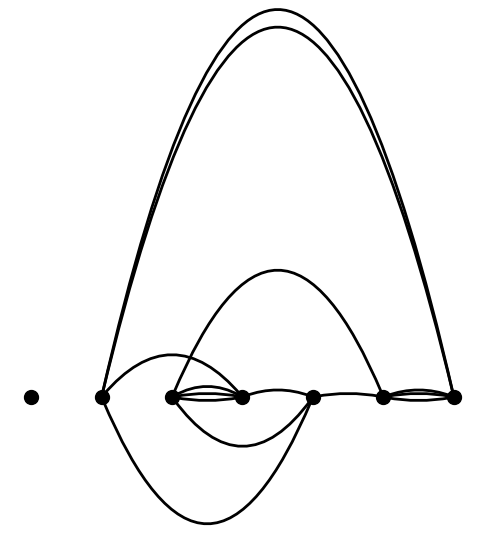

----------
t = 6
vdeg_0 (before) = 0
4 0 5
1 0 3
0 1 4
vdeg_0 (after) = 0


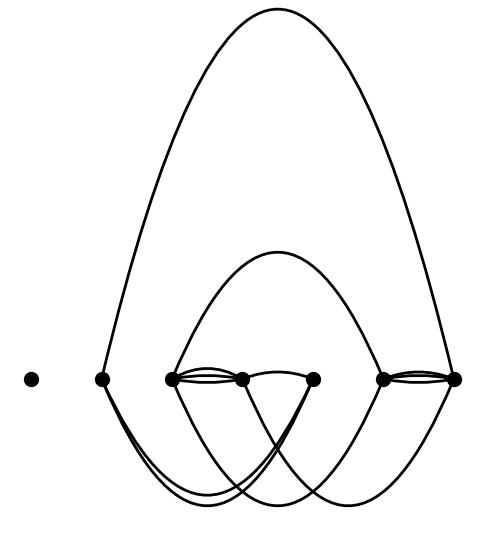

----------
t = 7
vdeg_0 (before) = 0
0 4 1
vdeg_0 (after) = 0


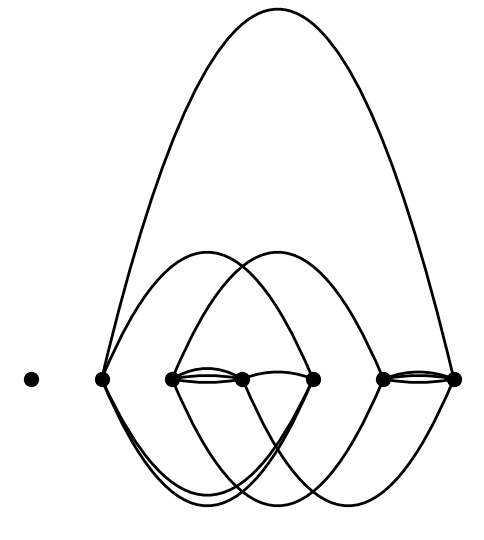

----------
t = 8
vdeg_0 (before) = 0
0 1 4
vdeg_0 (after) = 0


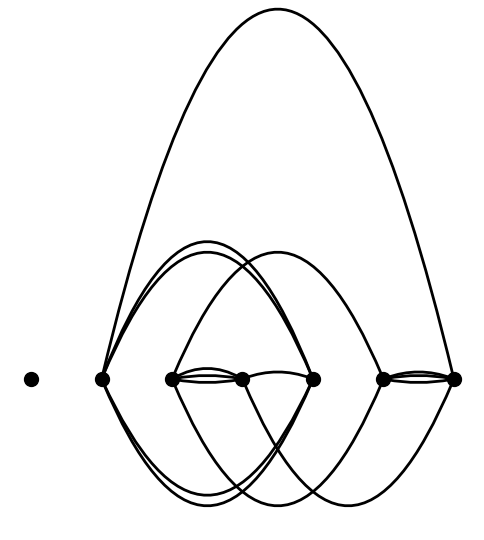

----------
t = 9
vdeg_0 (before) = 0
vdeg_0 (after) = 0


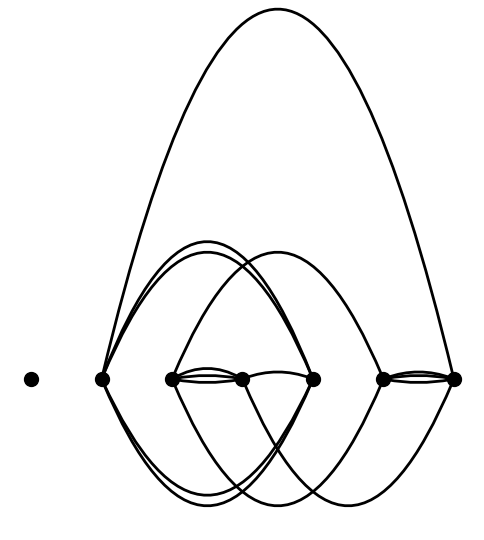

----------
t = 10
vdeg_0 (before) = 0
vdeg_0 (after) = 0


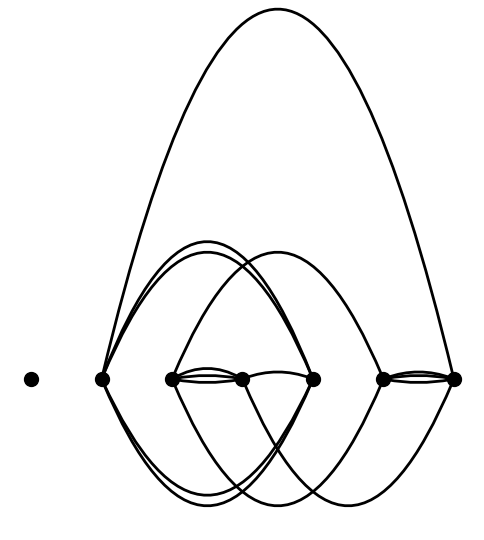

----------
t = 11
vdeg_0 (before) = 0
vdeg_0 (after) = 0


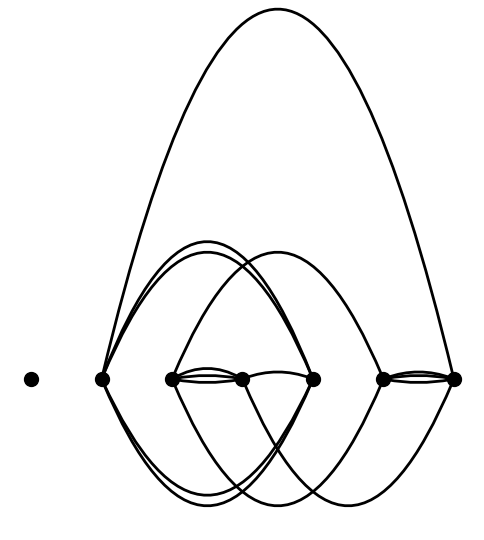

----------
t = 12
vdeg_0 (before) = 0
vdeg_0 (after) = 0


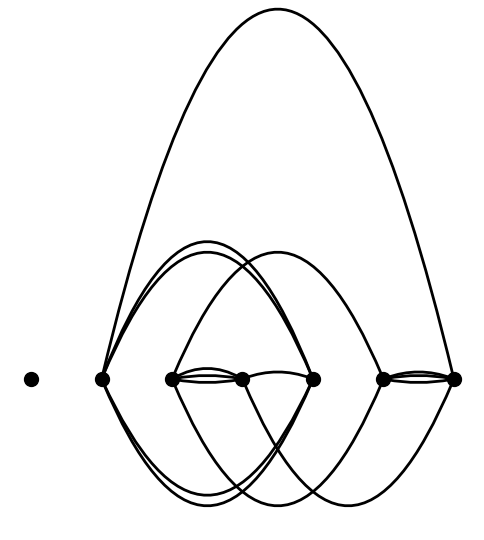

----------
t = 13
vdeg_0 (before) = 0
vdeg_0 (after) = 0


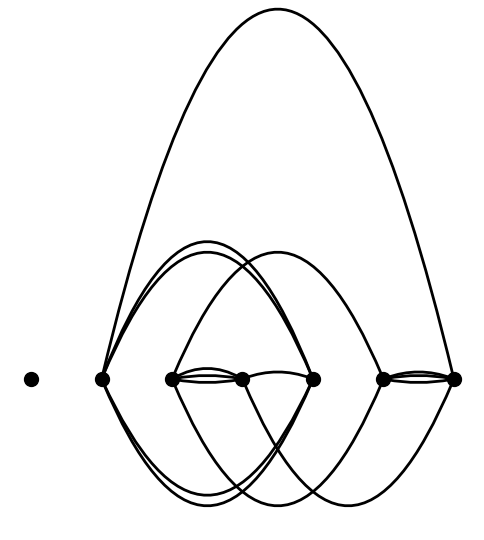

----------
t = 14
vdeg_0 (before) = 0
vdeg_0 (after) = 0


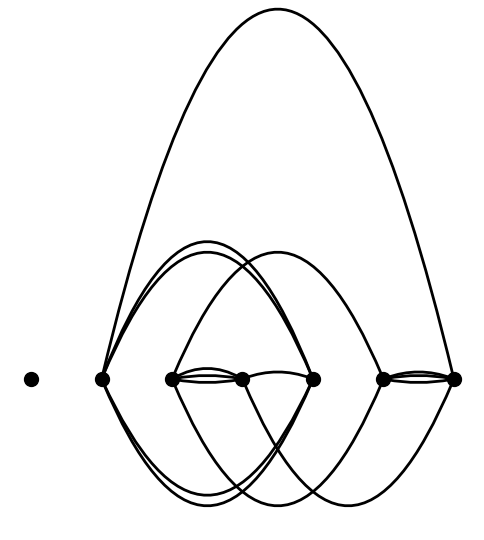

----------
t = 15
vdeg_0 (before) = 0
vdeg_0 (after) = 0


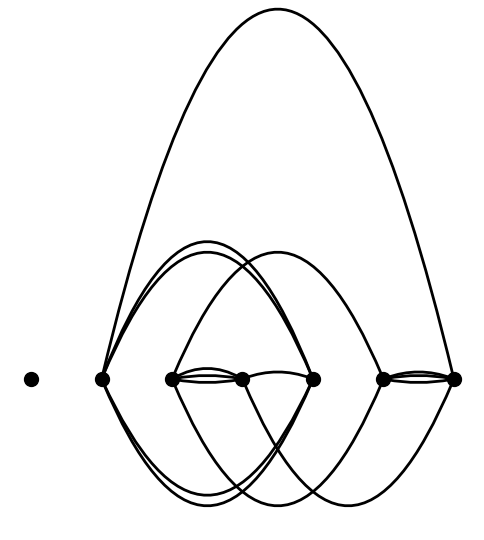

----------
t = 16
vdeg_0 (before) = 0
vdeg_0 (after) = 0


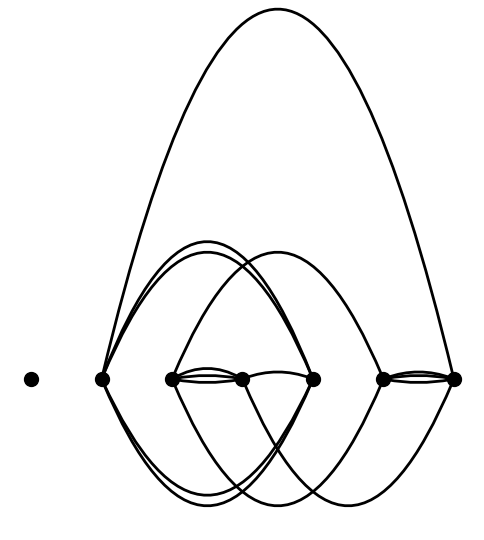

----------
t = 17
vdeg_0 (before) = 0
vdeg_0 (after) = 0


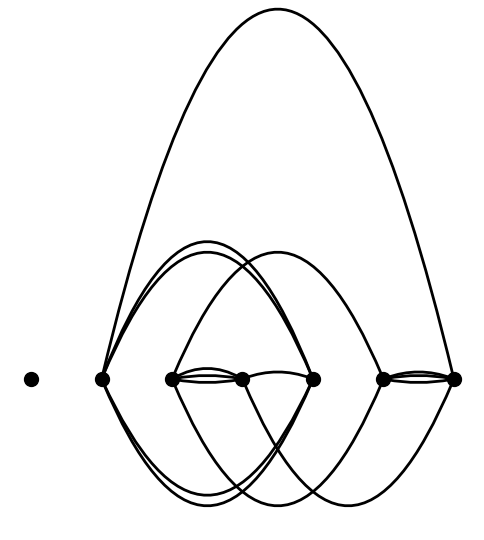

----------
t = 18
vdeg_0 (before) = 0
vdeg_0 (after) = 0


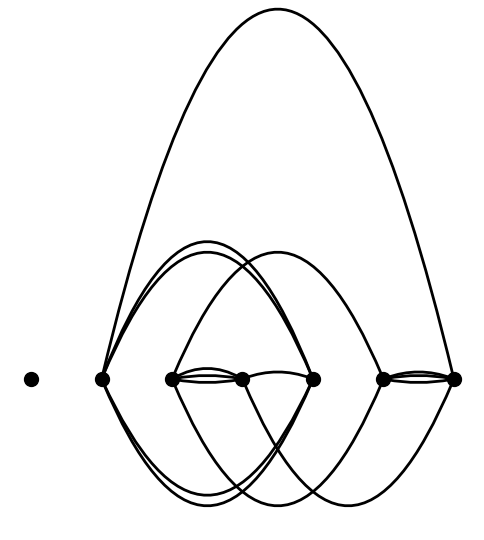

----------
t = 19
vdeg_0 (before) = 0
vdeg_0 (after) = 0


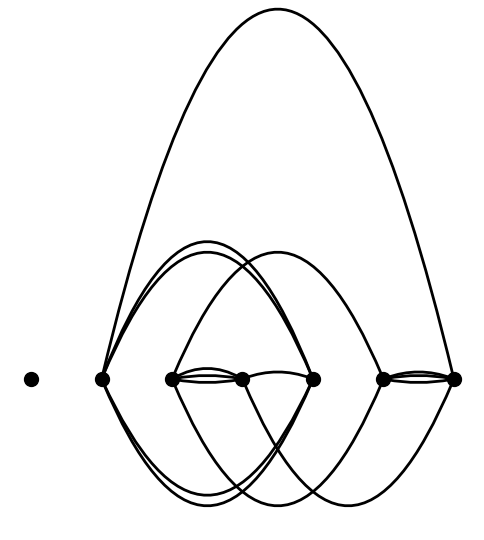

In [18]:
imp.reload(main)
imp.reload(pltm)
np.random.seed(randomseed)

A = main.adjacency_tree(d,k)
S = main.create_qubit_registers(A, qbits_per_channel)
for t in range(total_time):
    print('----------')
    print('t =',t)
    if protocol == 'srs':
        print('vdeg_0 (before) =',main.total_qubits_occupied_node(S, node=0))
        S = main.step_protocol_srs(S, p_gen, q_swap, p_swap, p_cons, cutoff, max_links_swapped)
        print('vdeg_0 (after) =',main.total_qubits_occupied_node(S, node=0))
    else:
        raise ValueError('Protocol not implemented')
    pltm.plot_entangled_links(S, layout='chain', show_link_data=False)

---

## Plot network after each operation

---

----------
t = 0
ENTANGLEMENT GENERATION


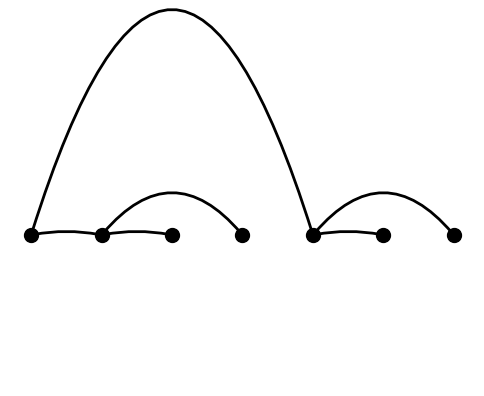

SWAPS


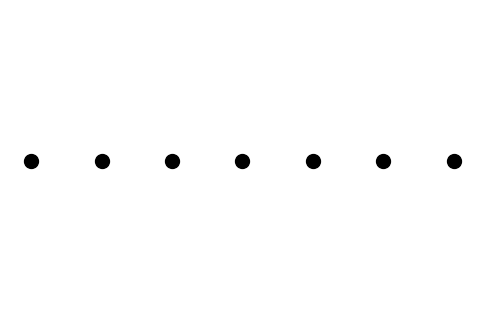

----------
t = 1
ENTANGLEMENT GENERATION


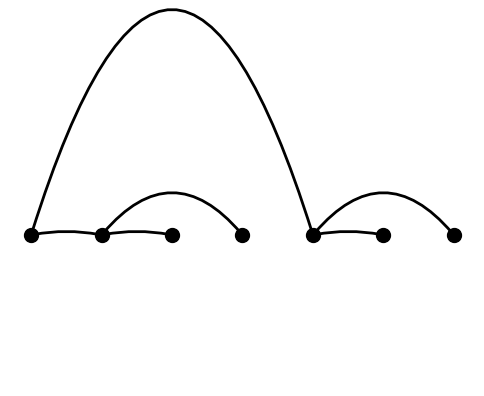

SWAPS


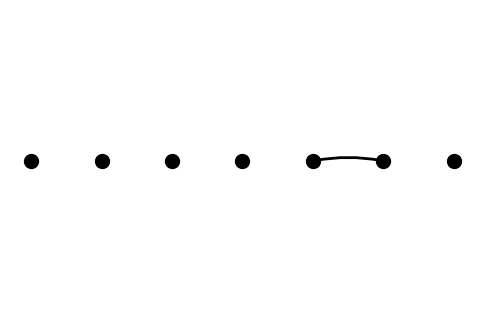

----------
t = 2
ENTANGLEMENT GENERATION


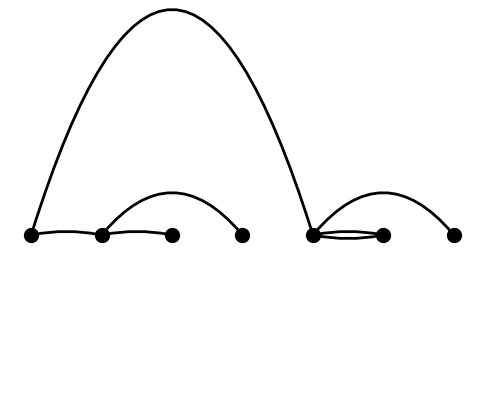

SWAPS


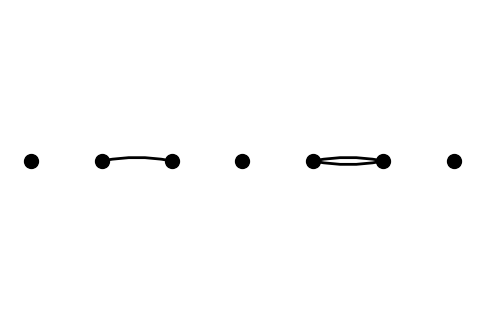

----------
t = 3
ENTANGLEMENT GENERATION


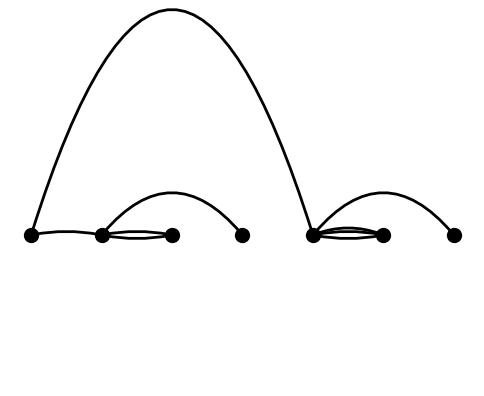

SWAPS


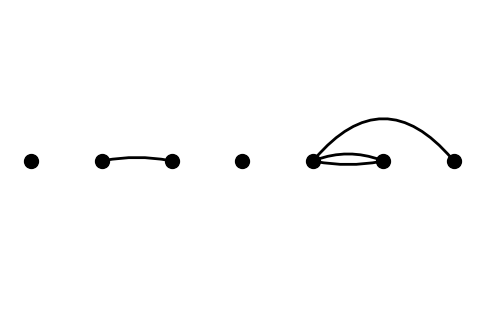

----------
t = 4
ENTANGLEMENT GENERATION


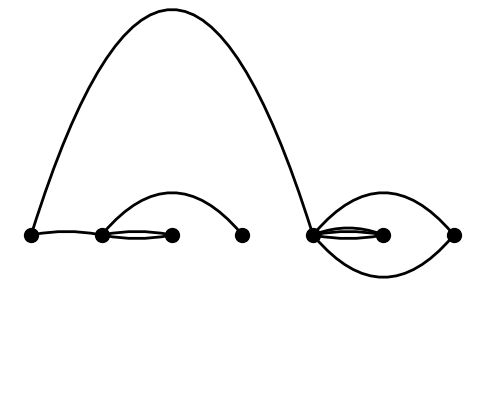

SWAPS


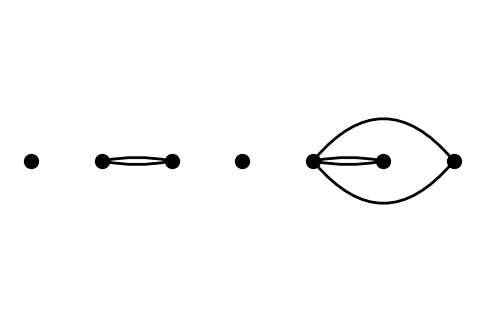

----------
t = 5
ENTANGLEMENT GENERATION


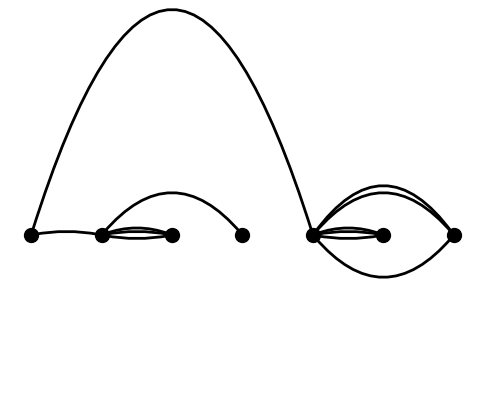

SWAPS


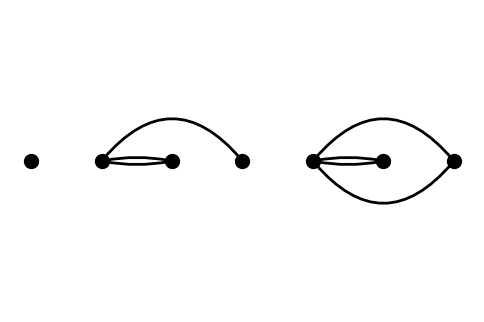

----------
t = 6
ENTANGLEMENT GENERATION


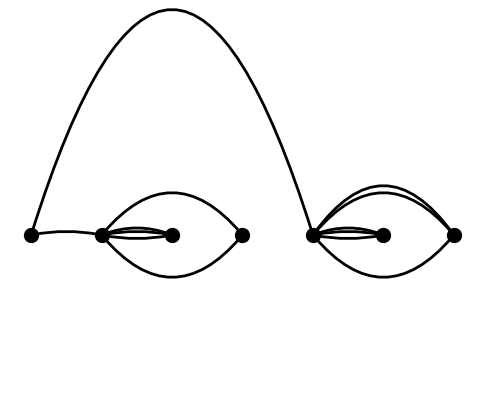

SWAPS


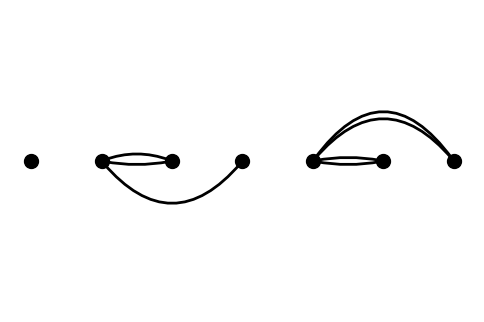

----------
t = 7
ENTANGLEMENT GENERATION


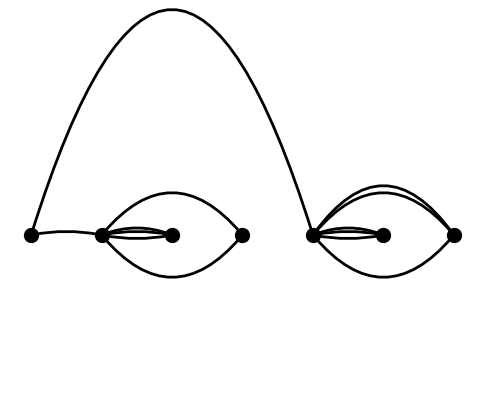

SWAPS


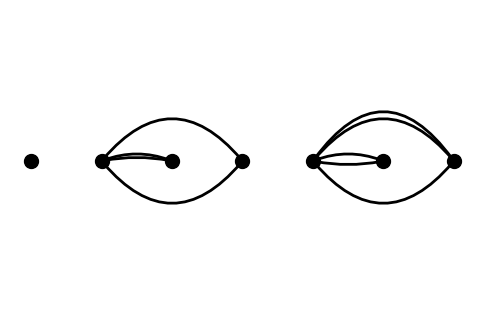

----------
t = 8
ENTANGLEMENT GENERATION


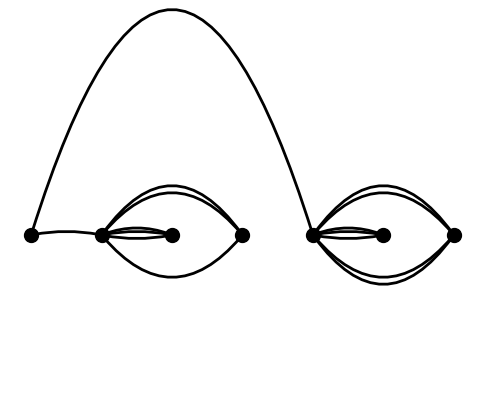

SWAPS


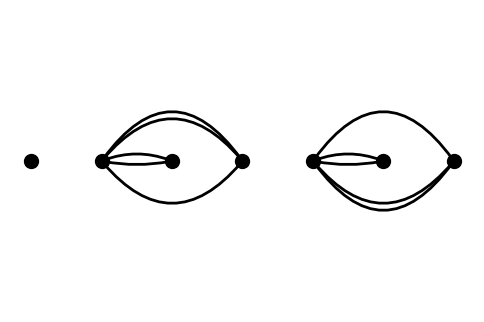

----------
t = 9
ENTANGLEMENT GENERATION


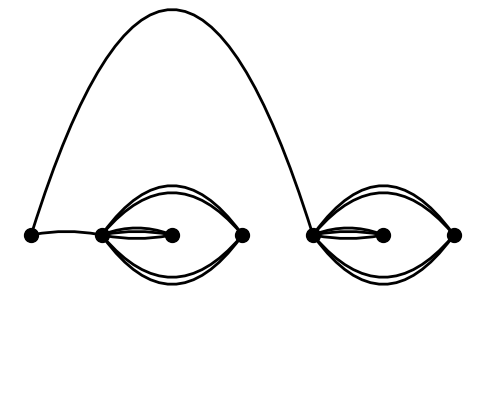

SWAPS


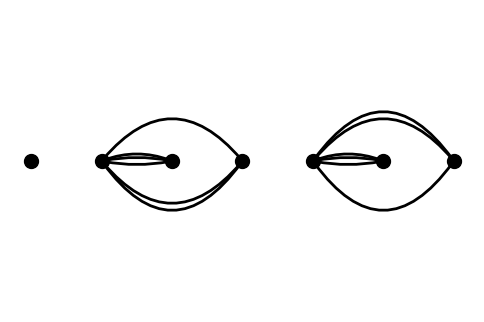

----------
t = 10
ENTANGLEMENT GENERATION


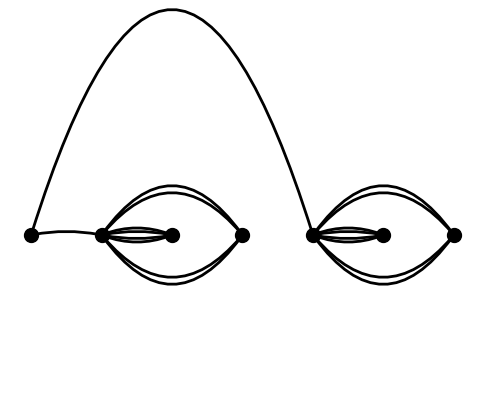

SWAPS


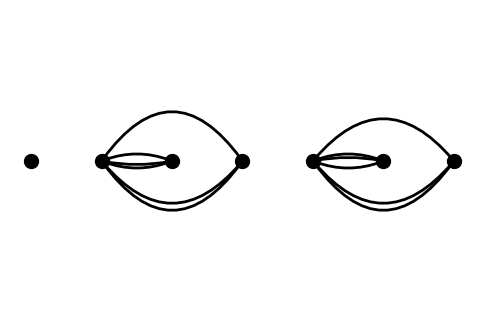

----------
t = 11
ENTANGLEMENT GENERATION


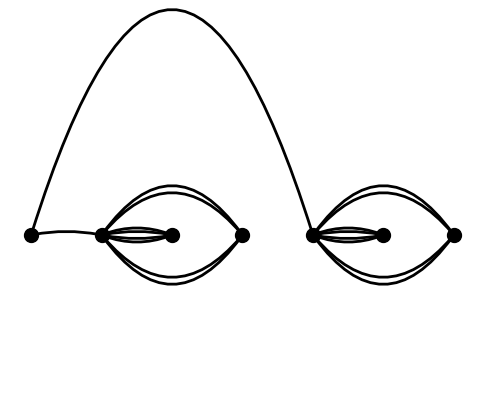

SWAPS


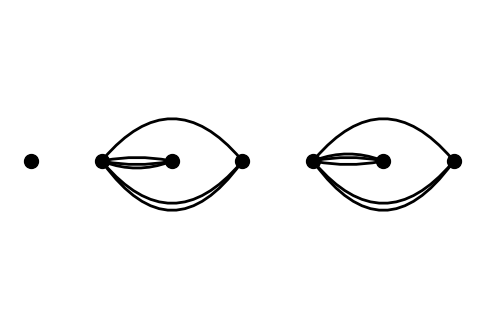

----------
t = 12
ENTANGLEMENT GENERATION


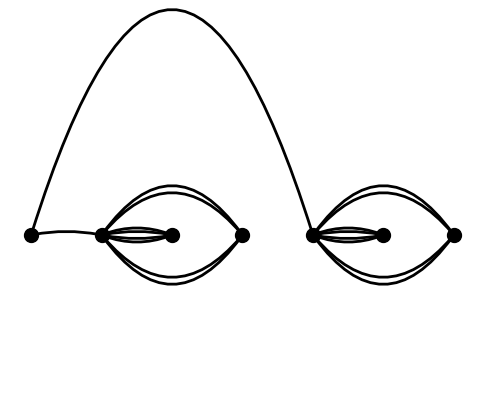

SWAPS


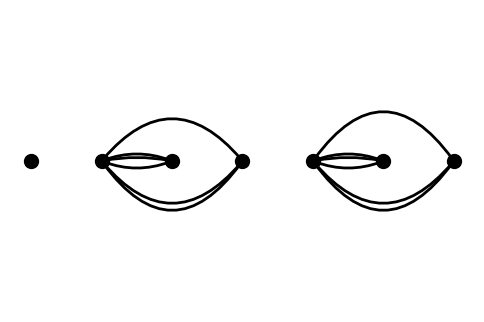

----------
t = 13
ENTANGLEMENT GENERATION


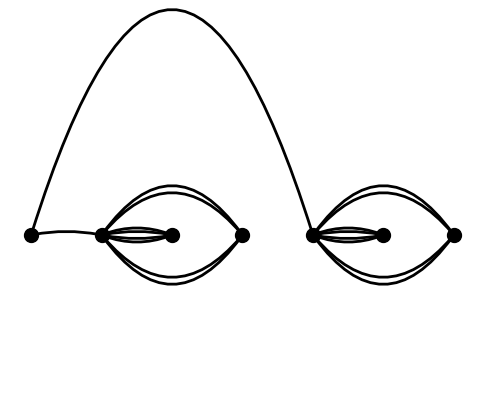

SWAPS


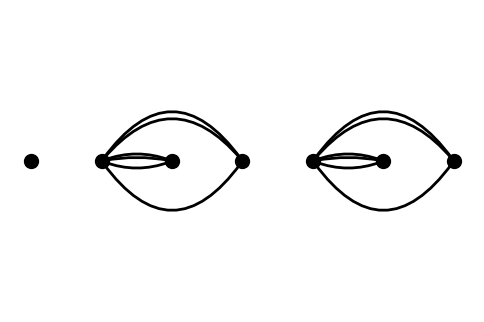

----------
t = 14
ENTANGLEMENT GENERATION


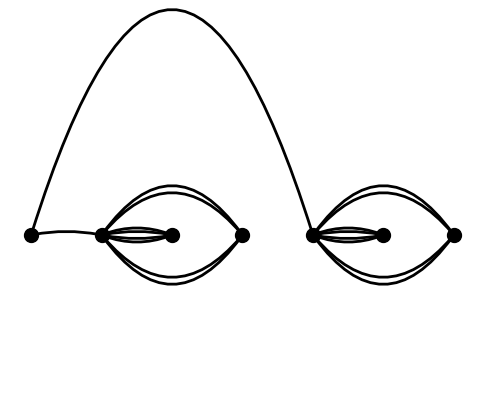

SWAPS


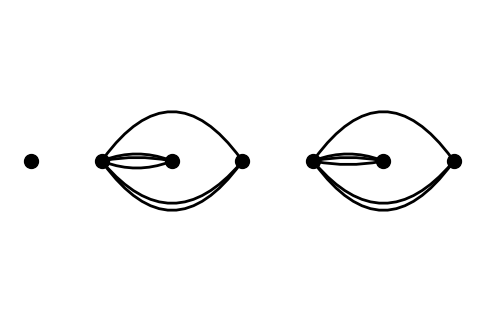

----------
t = 15
ENTANGLEMENT GENERATION


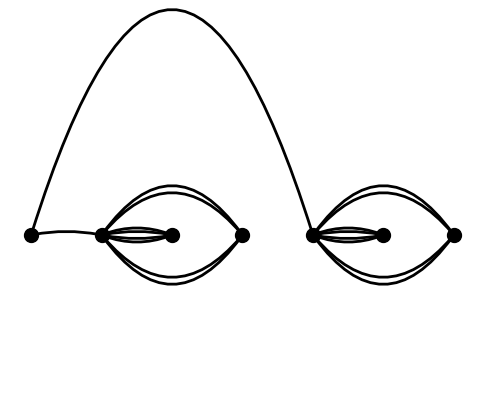

SWAPS


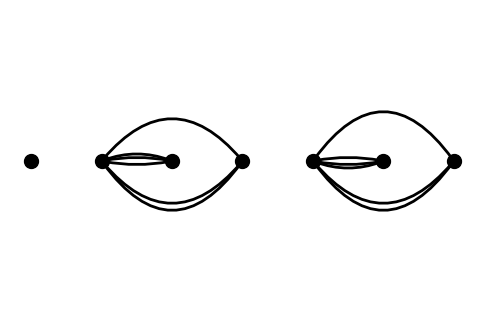

----------
t = 16
ENTANGLEMENT GENERATION


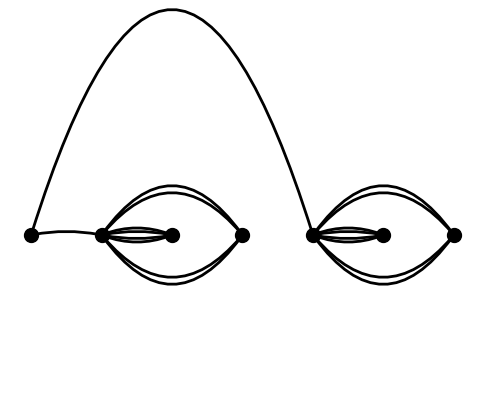

SWAPS


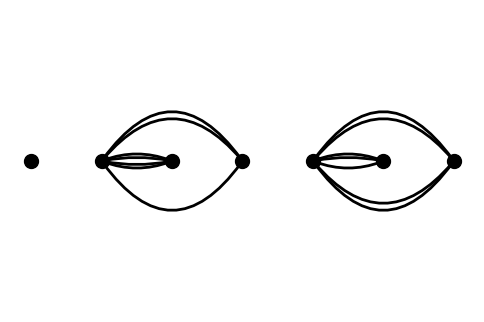

----------
t = 17
ENTANGLEMENT GENERATION


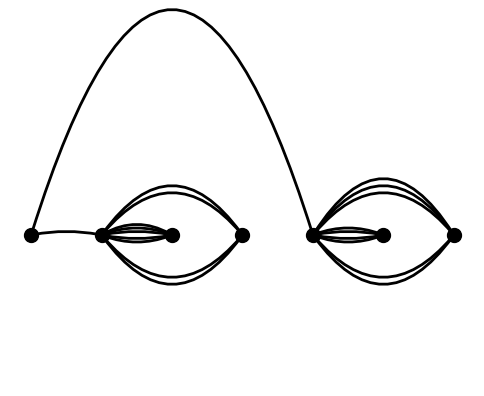

SWAPS


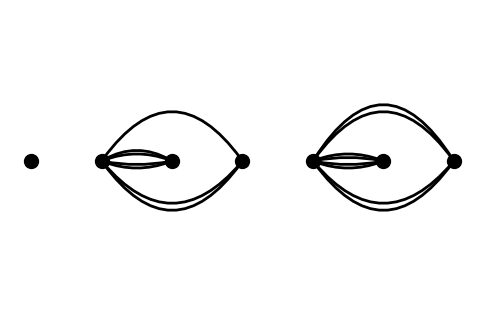

----------
t = 18
ENTANGLEMENT GENERATION


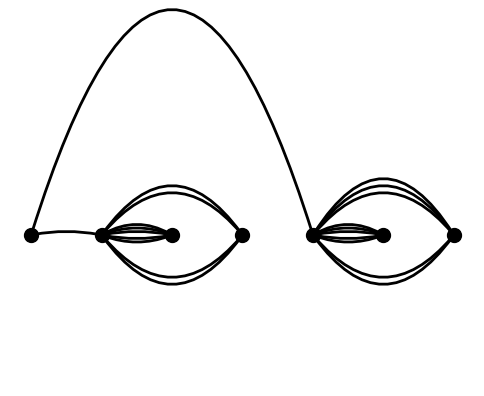

SWAPS


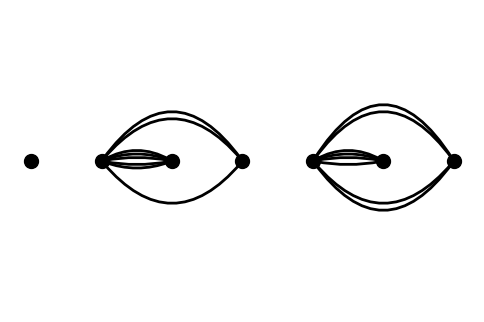

----------
t = 19
ENTANGLEMENT GENERATION


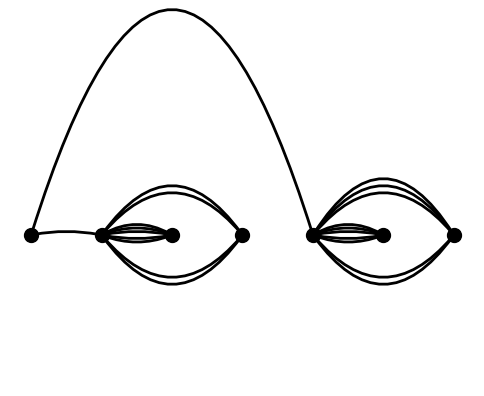

SWAPS


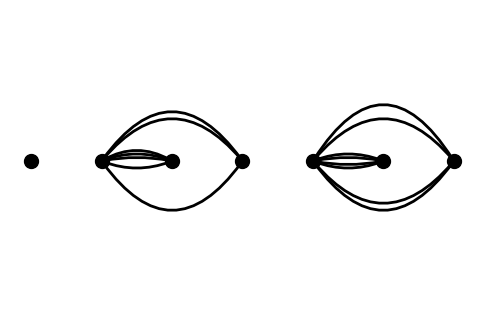

In [30]:
imp.reload(main)
imp.reload(pltm)
np.random.seed(randomseed)

A = main.adjacency_tree(d,k)
S = main.create_qubit_registers(A, qbits_per_channel)
for t in range(total_time):
    print('----------')
    print('t =',t)
    S = main.advance_time(S)
    S = main.cutoffs(S, cutoff)

    print('ENTANGLEMENT GENERATION')
    S = main.generate_all_links(S, p_gen)
    pltm.plot_entangled_links(S, layout='chain', show_link_data=False)
    
    print('SWAPS')
    if protocol == 'srs':
        S = main.step_protocol_srs(S, 0, q_swap, p_swap, 0, np.inf, np.inf)
    else:
        raise ValueError('Protocol not implemented')
    S = main.cutoffs(S, cutoff+10)
    pltm.plot_entangled_links(S, layout='chain', show_link_data=False)
    
#    print('TOO LONG LINKS')
#    S = main.remove_long_links(S, max_links_swapped)
#    pltm.plot_entangled_links(S, layout='chain', show_link_data=False)

#    print('CONSUMPTION')
#    S = main.consume_fixed_rate(S, p_cons)
#    pltm.plot_entangled_links(S, layout='chain', show_link_data=False)